# 1. 파이썬의 컴퓨팅 라이브러리, numpy
**numpy를 이용해서 데이터를 다뤄봅시다!**

### Our Goal
1. Numpy 시작하기
    - prerequisite : Python의 List
    - numpy import하기
    - numpy.array

2. Numpy로 연산하기
    - Vector - Scalar : elementwise! (+, -, *, /)
    - Vector - Vector : elementwise / broadcasting (+, -, *, /)
    - Indexing & Slicing
3. Example : Linear Algebra with Numpy
    1. basics
    - 영벡터 : `.zeros()`
    - 일벡터 : `.ones()`
    - 대각행렬 : `.diag()`
    - 항등행렬 : `.eye()`
    - 행렬곱 : `@` / `.dot()`
  
    2. furthermore
    - 트레이스 : `.trace()`
    - 행렬식 : `.linalg.det()`
    - 역행렬 : `.linalg.inv()`
    - 고유값 : `.linalg.eig()`


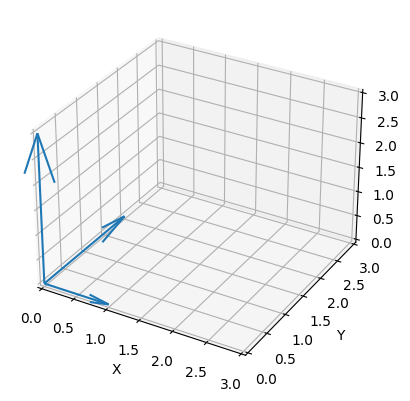

In [124]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

vectors = np.array([1,0,0,0,2,0,0,0,3]).reshape(3,3)
X, Y, Z = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(0,0,0,X, Y, Z, length=1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## I. Numpy 시작하기

## II. Numpy로 연산하기

### Vector와 Scalar 사이의 연산
벡터의 각 원소에 대한 연산 진행 
$$x=\begin{pmatrix} 1\\2\\3\end{pmatrix}, c=5$$

In [125]:
import numpy as np
x = np.array([1,2,3])
c = 5
print(f'더하기 : {x+c}')
print(f'빼기 : {x-c}')
print(f'곱하기 : {x*c}')
print(f'나누기 : {x/c}')

더하기 : [6 7 8]
빼기 : [-4 -3 -2]
곱하기 : [ 5 10 15]
나누기 : [0.2 0.4 0.6]


### Vector와 Vector사이의 연산
벡터의 **같은 인덱스**끼리 연산됨.

$$y=\begin{pmatrix} 1\\3\\5\end{pmatrix}, z=\begin{pmatrix} 2\\9\\20\end{pmatrix}$$

In [126]:
y = np.array([1,3,5])
z = np.array([2,9,20])

print(f'더하기 : {y+z}')
print(f'빼기 : {y-z}')
print(f'곱하기 : {y*z}')
print(f'나누기 : {y/z}')

더하기 : [ 3 12 25]
빼기 : [ -1  -6 -15]
곱하기 : [  2  27 100]
나누기 : [0.5        0.33333333 0.25      ]


### Indexing & slicing
$$w=\begin{pmatrix} 1&2&3&4\\5&6&7&8\\9&10&11&12\end{pmatrix}$$

In [127]:
w = np.arange(1,13).reshape(3,4)
w

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [128]:
w[0,0], w[2,3]

(1, 12)

In [151]:
# 열벡터 확인
for c in range(4):
    print(w[:,c], end = ' ')

print()
# 행벡터 확인
for r in range(3):
    print(w[r,:],end = ' ')

[1 5 9] [ 2  6 10] [ 3  7 11] [ 4  8 12] 
[1 2 3 4] [5 6 7 8] [ 9 10 11 12] 

### Array의 Broadcasting
numpy가 연산하는 특정한 방법
- `Broadcasting` :
같은 데이터 형식의 행렬이 아니더라도 연산 가능하도록 변환하여 연산을 수행함.

In [153]:
x = np.array([0,1,0])# 행벡터:1차원

print(x[:,np.newaxis]) # 열 지정하지 않음. 행만 가져옴.
print(x[None,:])

[[0]
 [1]
 [0]]
[[0 1 0]]


1. $M\times N$ - $M\times 1$ : 행렬과 열벡터 사이 연산
$$\begin{pmatrix} 1&2&3&4\\5&6&7&8\\9&10&11&12\end{pmatrix}+\begin{pmatrix} 0\\1\\0\end{pmatrix}$$

In [131]:
import numpy as np

a = np.arange(1,13).reshape(3,4)
x = np.array([0,1,0])
x = x[:, None] # Transpose

print(a+x)


[[ 1  2  3  4]
 [ 6  7  8  9]
 [ 9 10 11 12]]


2. $M\times N$ - $1\times N$ : 행렬과 행벡터 사이 연산
- 인덱스끼리의 곱셈결과
$$\begin{pmatrix} 1&2&3&4\\5&6&7&8\\9&10&11&12\end{pmatrix}* \begin{pmatrix} 0&1&-1&-11\end{pmatrix}$$


In [132]:
    y = np.array([0,1,-1,-11])
    print(a*y)

[[   0    2   -3  -44]
 [   0    6   -7  -88]
 [   0   10  -11 -132]]


3.$M\times 1$ - $1\times N$ : 열벡터와  행벡터 사이 연산
$$\begin{pmatrix} 1&2&3\end{pmatrix}+\begin{pmatrix} 2\\0\\-2\end{pmatrix}$$

- 변환된 형태 
$$\begin{pmatrix} 1&2&3\\1&2&3\\1&2&3 \end{pmatrix}+ \begin{pmatrix} 2&2&2\\0&0&0\\-2&-2&-2\end{pmatrix}$$

In [154]:
cv = np.array([1,2,3])
rv = np.array([2,0,-2])[:,None]
print(cv+rv)

[[ 3  4  5]
 [ 1  2  3]
 [-1  0  1]]


## III. Numpy로 선형대수 지식 끼얹기

In [134]:
# 영행렬

np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [135]:
# 모든 원소 1인 행렬
np.ones(2), np.ones((2,2))

(array([1., 1.]),
 array([[1., 1.],
        [1., 1.]]))

In [136]:
# 대각행렬
np.diag((1,2,3,4))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [156]:
# 항등행렬 : I
# dtype = int, uint, float, complex,... 
np.eye(3, dtype = float)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

$
\begin{pmatrix}1&4&3\\2&3&2\\1&2&3 \end{pmatrix}
\cdot
\begin{pmatrix}7&9&1\\1&6&5\\0&9&2 \end{pmatrix}
$

In [159]:
# 행렬곱 : 내적의 결과
m1 = np.array([[1,4,3],[2,3,2],[1,2,3]])
m2 = np.array([[7,9,1],[1,6,5],[0,9,2]])

m1.dot(m2)

array([[11, 60, 27],
       [17, 54, 21],
       [ 9, 48, 17]])

In [160]:
m1@m2

array([[11, 60, 27],
       [17, 54, 21],
       [ 9, 48, 17]])

In [140]:
# trace
np.eye(4,dtype=float).trace()

4.0

$$
\begin{vmatrix}1&4&3\\2&3&2\\1&2&3 \end{vmatrix}
$$

In [141]:
# 행렬식 - linear algenbra 라이브러리
np.linalg.det(m1)

-8.000000000000002

In [142]:
# 역행렬 - linear algenbra 라이브러리
m1_inv = np.linalg.inv(m1)
m1_inv

array([[-0.625,  0.75 ,  0.125],
       [ 0.5  ,  0.   , -0.5  ],
       [-0.125, -0.25 ,  0.625]])

In [143]:
# 확인 
m1@m1_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [144]:
# 고유값과 고유벡터
print(m1, end='\n')
np.linalg.eig(m1)
# 고유값과 각각에 상응하는 고유벡터가 출력됨.

[[1 4 3]
 [2 3 2]
 [1 2 3]]


EigResult(eigenvalues=array([ 6.82842712, -1.        ,  1.17157288]), eigenvectors=array([[-6.50840283e-01, -8.94427191e-01, -2.33811454e-01],
       [-5.89767825e-01,  4.47213595e-01, -5.89767825e-01],
       [-4.78101286e-01,  5.26225819e-17,  7.72985198e-01]]))

$ax = \lambda x$

In [145]:
# val : ax = lambda*x
eig_val, eig_vec = np.linalg.eig(m1)
eig_val

array([ 6.82842712, -1.        ,  1.17157288])

In [146]:
eig_vec

array([[-6.50840283e-01, -8.94427191e-01, -2.33811454e-01],
       [-5.89767825e-01,  4.47213595e-01, -5.89767825e-01],
       [-4.78101286e-01,  5.26225819e-17,  7.72985198e-01]])

In [147]:
m1 @ eig_vec[:,0]

array([-4.44421544, -4.02718661, -3.26467979])

In [148]:
eig_val[0]* eig_vec[:,0] # scalar * vector

array([-4.44421544, -4.02718661, -3.26467979])

## IV. Exercises

### 1. 어떤 벡터가 주어졌을 때 L2 norm을 구하는 함수 `get_L2_norm()`을 작성하세요

- **매개변수** : 1차원 벡터 (`np.array`)
- **반환값** : 인자로 주어진 벡터의 L2 Norm값 (`number`)

In [149]:
def get_L2_norm(array : np.array):
    return sum([i**2 for i in array])**(0.5)
#sum([i**2 for i in array])**(0.5)
#np.linalg.norm(array)메소드 활용 가능 
get_L2_norm(np.array([3,4]))

5.0

### 2. 어떤 행렬이 singular matrix인지 확인하는 함수 `is_singular()` 를 작성하세요

- 매개변수 : 2차원 벡터(`np.array`)
- 반환값 : 인자로 주어진 벡터가 singular하면 True, non-singular하면 False를 반환 

In [150]:
def is_singular(arr : np.array):
    return False if np.linalg.det(arr) else True

print('input: \n',m1)
is_singular(m1)

input: 
 [[1 4 3]
 [2 3 2]
 [1 2 3]]


False